In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/sentisum/sentisum-assessment-dataset.csv')

Simple text pre-processing

In [4]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [5]:
norm_corpus = normalize_corpus(df['text'])
norm_corpus

array(['tires delivered garage choicethe garage notified delivered day time arranged garage went fitteda hassel free experience',
       'easy tyre selection process competitive pricing excellent fitting service',
       'easy use good value money', ...,
       'ordered tyre needed line booked specified time local garage tyre fitted worked well time would use redacted good price tyre quick search online',
       'excellent service point order fitting complaints thank',
       'seamless well managed ends would recommend'], dtype='<U2107')

Bag of Words Model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,aaa,ab,abandoned,abbey,abc,abd,aberdeen,abergavenny,abide,ability,abingdon,abit,able,abou,abrasive,abroad,abroaddisgusting,abrupt,abruptly,abs,absence,absolute,absolutely,absolutle,absorbed,abysmal,ac,accept,acceptable,acceptance,accepted,accepting,access,accessible,accident,accidentally,accociates,accommodate,accommodated,accommodates,...,year,years,yearsnever,yellow,yes,yesterday,yet,yethelp,yetvery,yetwould,yhem,yo,yokohama,yokohamasjust,yorks,yorkshire,youanother,youd,youfitted,youi,youive,youjim,youll,young,youre,yourselfs,youve,yr,yrs,yup,zealous,zero,zeros,zone,zs,zv,zvs,zx,zxs,zzs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Bag of N-Grams Model

In [8]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,ab outstanding,abandoned minutes,abbey tyres,abc fitted,abd great,aberdeen charge,aberdeen first,aberdeen went,abergavenny happy,abide use,ability book,ability browse,ability choose,ability delivered,ability fitted,ability pick,ability review,ability use,abingdon past,abit information,able adjust,able answer,able arrangements,able attend,able attendance,able award,able book,able browse,able buy,able carry,able change,able choice,able choose,able choosegood,able chose,able collect,able compare,able contact,able deliver,able drive,...,young lads,young lady,young lass,young really,young son,young technician,young woman,youre best,youre case,youre local,youre looking,youre patient,youre quality,youre something,youre stuffed,youre thinking,youre unable,yourselfs infact,youve already,youve booked,youve chosen,youve dealing,youve done,youve got,yr old,yrs ago,yup great,zealous revving,zero response,zero road,zeros car,zone list,zone restrictions,zs good,zv tyres,zvs worn,zx fitted,zx front,zxs chose,zzs front
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


TF-IDF Model

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aaa,ab,abandoned,abbey,abc,abd,aberdeen,abergavenny,abide,ability,abingdon,abit,able,abou,abrasive,abroad,abroaddisgusting,abrupt,abruptly,abs,absence,absolute,absolutely,absolutle,absorbed,abysmal,ac,accept,acceptable,acceptance,accepted,accepting,access,accessible,accident,accidentally,accociates,accommodate,accommodated,accommodates,...,year,years,yearsnever,yellow,yes,yesterday,yet,yethelp,yetvery,yetwould,yhem,yo,yokohama,yokohamasjust,yorks,yorkshire,youanother,youd,youfitted,youi,youive,youjim,youll,young,youre,yourselfs,youve,yr,yrs,yup,zealous,zero,zeros,zone,zs,zv,zvs,zx,zxs,zzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Document Similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10092,10093,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105,10106,10107,10108,10109,10110,10111,10112,10113,10114,10115,10116,10117,10118,10119,10120,10121,10122,10123,10124,10125,10126,10127,10128,10129,10130,10131
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.109539,0.000000,0.000000,0.071883,0.174741,0.000000,0.000000,0.000000,0.086476,0.000000,0.000000,0.000000,0.000000,0.000000,0.112603,0.000000,0.000000,0.000000,0.116610,0.048303,0.000000,0.075187,0.000000,0.081176,0.126346,0.026783,0.000000,0.000000,0.034607,0.000000,0.142180,0.000000,0.000000,0.042581,0.063555,...,0.048371,0.000000,0.000000,0.000000,0.000000,0.084383,0.000000,0.104174,0.000000,0.042888,0.036005,0.000000,0.171491,0.000000,0.000000,0.034810,0.081092,0.000000,0.000000,0.078233,0.000000,0.000000,0.040855,0.033954,0.000000,0.127222,0.000000,0.013518,0.000000,0.020769,0.030045,0.000000,0.000000,0.000000,0.095524,0.050154,0.082960,0.074038,0.000000,0.000000
1,0.000000,1.000000,0.070437,0.061376,0.260551,0.054968,0.110528,0.232336,0.000000,0.000000,0.076764,0.023716,0.100723,0.049295,0.000000,0.079697,0.091095,0.031095,0.359269,0.000000,0.000000,0.083919,0.178586,0.225936,0.000000,0.000000,0.000000,0.097067,0.060260,0.045984,0.039993,0.079401,0.103860,0.032993,0.081007,0.000000,0.000000,0.139359,0.024273,0.096306,...,0.129259,0.227823,0.051047,0.103682,0.047222,0.031128,0.035935,0.020318,0.066900,0.041347,0.215206,0.090850,0.078702,0.110148,0.368802,0.152852,0.046227,0.018189,0.000000,0.000000,0.000000,0.136777,0.045198,0.087115,0.000000,0.092735,0.078390,0.012887,0.059690,0.079985,0.103286,0.047026,0.155493,0.096285,0.239935,0.044392,0.000000,0.122279,0.146417,0.000000
2,0.000000,0.070437,1.000000,0.092102,0.057833,0.000000,0.044301,0.000000,0.000000,0.201711,0.375056,0.200875,0.355110,0.240850,0.000000,0.166494,0.139501,0.194225,0.056857,0.077023,0.085295,0.117639,0.271119,0.000000,0.000000,0.000000,0.000000,0.474258,0.062945,0.000000,0.060014,0.183471,0.067697,0.000000,0.000000,0.000000,0.149543,0.090835,0.246361,0.062773,...,0.242350,0.000000,0.108757,0.000000,0.000000,0.032515,0.076560,0.000000,0.000000,0.000000,0.130955,0.000000,0.000000,0.000000,0.158956,0.077999,0.069369,0.115381,0.000000,0.000000,0.057053,0.000000,0.078841,0.000000,0.000000,0.000000,0.000000,0.000000,0.254339,0.310403,0.067323,0.117675,0.103259,0.049133,0.081714,0.000000,0.068237,0.081016,0.000000,0.000000
3,0.000000,0.061376,0.092102,1.000000,0.292946,0.000000,0.000000,0.000000,0.000000,0.000000,0.100373,0.000000,0.131702,0.064457,0.000000,0.000000,0.051738,0.040659,0.217957,0.000000,0.000000,0.000000,0.043635,0.000000,0.000000,0.000000,0.000000,0.126922,0.000000,0.000000,0.052293,0.038408,0.058988,0.000000,0.000000,0.000000,0.117440,0.079149,0.031739,0.054697,...,0.036054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035047,0.000000,0.000000,0.000000,0.058953,0.288711,0.265922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058662,0.100076,0.000000,0.042812,0.071201,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.260551,0.057833,0.292946,1.000000,0.000000,0.119828,0.157028,0.000000,0.170248,0.063027,0.000000,0.082699,0.040474,0.000000,0.065436,0.074794,0.025531,0.211024,0.000000,0.000000,0.046235,0.063080,0.071074,0.000000,0.191180,0.000000,0.217248,0.049477,0.000000,0.032836,0.065192,0.085275,0.000000,0.000000,0.000000,0.039186,0.114421,0.019930,0.079073,...,0.022640,0.000000,0.000000,0.138454,0.000000,0.025558,0.000000,0.000000,0.036858,0.059194,0.289662,0.028579,0.109377,0.000000,0.202903,0.098253,0.037955,0.000000,0.000000,0.000000,0.000000,0.062217,0.064706,0.042133,0.000000,0.076141,0.043188,0.000000,0.000000,0.033159,0.084803,0.038611,0.000000,0.061891,0.197000,0.000000,0.000000,0.141301,0.046059,0.000000
...,...,...,...

Clustering documents using similarity features

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5656,5676,0,2
1,5704,10132,0,3
2,5923,10133,0,4
3,6013,10134,0,5
4,6188,10135,0,6
...,...,...,...,...
10126,20236,20253,131.3,812
10127,20252,20256,137.971,1826
10128,20258,20259,164.273,2638
10129,20250,20260,182.408,3034


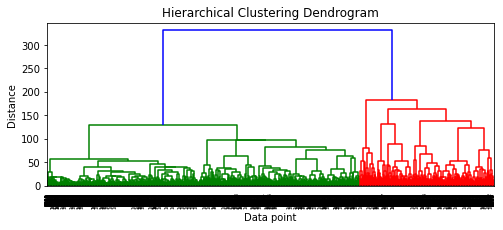

In [12]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [14]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([df['text'], cluster_labels], axis=1)

,text,ClusterLabel
0,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free exper...",1555
1,"Easy Tyre Selection Process, Competitive Pricing and Excellent Fitting Service",4780
2,Very easy to use and good value for money.,9539
3,Really easy and convenient to arrange,4197
4,It was so easy to select tyre sizes and arrange local fitting. The prices were competitive,8142
...,...,...
10127,"I ordered the wrong tyres, however [REDACTED] arranged for them to be collected and supplied the correct tyres within 2 days, whilst also refunding the difference straight away. Excellent service.",1034
10128,"Good experience, first time I have used [REDACTED], Harborne tyres were very efficient, they contacted me to let me know when they could fit my tyres, overall a very good experience.",6160
10129,"I ordered the tyre I needed on line, booked a specified time at a local garage and I had the tyre fitted. All worked very well, to time, and I would use [REDACTED] again. Good price for the tyre, ...",6141
10130,Excellent service from point of order to fitting. No complaints at all. Thank You.,4969
